In [13]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
# has a particular focus on training and inference of deep neural networks
from tensorflow import keras
# open source Python library for developing and evaluating deep learning models
from tensorflow.keras import datasets

In [14]:
mnist = tf.keras.datasets.mnist

In [15]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [16]:
x_test.shape

(10000, 28, 28)

In [17]:
x_train.shape

(60000, 28, 28)

In [18]:
x_train=x_train/255
x_test=x_test/255

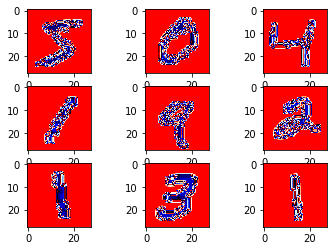

In [19]:
for i in range (9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap ='flag')

In [20]:
print(x_train.shape)
print(x_train[0])

(60000, 28, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0

In [21]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
# giving new shape to array

In [22]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation ='relu'),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


In [23]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss ='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [24]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 2.4500 - accuracy: 0.0710


[2.450021266937256, 0.07100000232458115]

In [25]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2619 - accuracy: 0.9253
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1143 - accuracy: 0.9659
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0784 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0589 - accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0460 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0358 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0291 - accuracy: 0.9908: 0s - loss: 0.028
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0240 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0200 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/

In [29]:
y_pred=[]
pred=model.predict(x_test)
for element in pred:
    y_pred.append(np.argmax(element))
    

In [30]:
y_pred=np.array(y_pred)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [31]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 969,    0,    0,    0,    0,    2,    4,    1,    4,    0],
       [   0, 1117,    3,    1,    0,    1,    3,    1,    9,    0],
       [   8,    2,  998,    2,    1,    0,    3,    5,   12,    1],
       [   0,    0,    5,  985,    0,    8,    0,    3,    5,    4],
       [   2,    1,    0,    1,  954,    2,    6,    1,    3,   12],
       [   2,    0,    0,    3,    0,  876,    5,    1,    4,    1],
       [   5,    2,    0,    1,    1,    2,  945,    0,    2,    0],
       [   1,    2,    5,    3,    0,    0,    0, 1008,    6,    3],
       [   3,    0,    2,    1,    0,    3,    1,    2,  960,    2],
       [   1,    2,    0,    3,    4,    5,    0,    7,    6,  981]],
      dtype=int64)

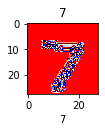

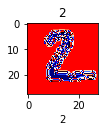

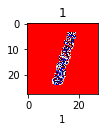

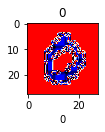

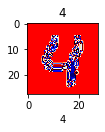

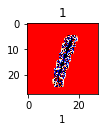

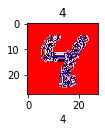

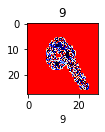

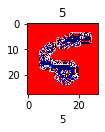

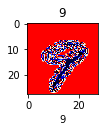

In [33]:
for i in range(0,10):
    plt.figure(figsize=(15,10))
    plt.subplot(1,10,i+1)
    plt.imshow(x_test[i],cmap = 'flag')
    plt.xlabel(y_pred[i])
    plt.title(y_test[i])

In [34]:
actual=y_test
predicted=y_pred
final=pd.DataFrame({'Actual' :actual,'Predicted':predicted})
final.head(20)

,Actual,Predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


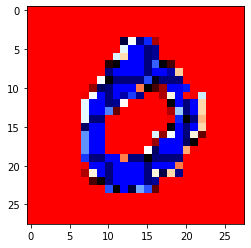

In [35]:
plt.imshow(x_test[3], cmap= 'flag')

In [36]:
prediction=model.predict(x_test)
print(np.argmax(prediction[3]))

0


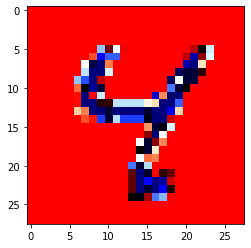

In [37]:
plt.imshow(x_test[6], cmap= 'flag')

In [38]:
prediction=model.predict(x_test)
print(np.argmax(prediction[6]))

4
